<div align="center"> <h1>Изучение влияния затухания на параметрическую генерацию</h1></div>

In [2]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.signal import argrelextrema

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 14})

In [3]:
# system of differential equations (SDE)
def model(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    
    dxdt = y * z - delta * x
    dydt = x * z - delta * y
    dzdt = -x * y - delta * z
    drdt = [dxdt, dydt, dzdt]
    return drdt

In [4]:
# params
delta = 0.05
t = np.linspace(0, 100, 1000)

# initial conditions
r0 = [0.1, 0, 1]

# solve SDE
r = odeint(model, r0, t)

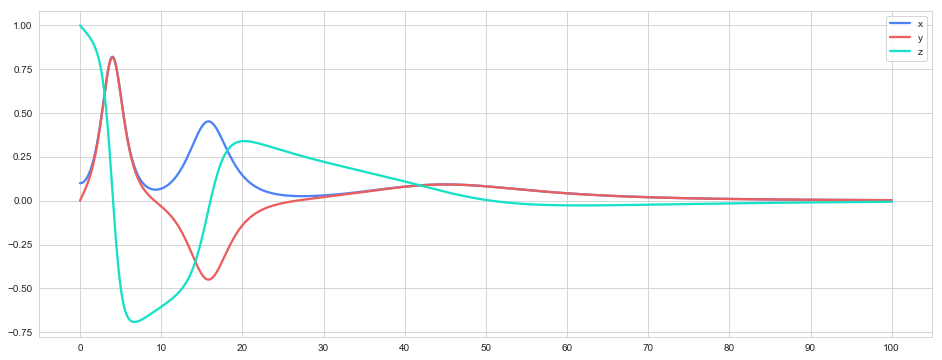

In [5]:
# plotting graphs
xt = np.linspace(0, 100, 11) # for xticks

plt.figure(figsize = (16, 6))
plt.xticks(xt)
plt.plot(t, r[:,0], color = '#4d83f6', lw = 2.3, label = 'x')
plt.plot(t, r[:,1], color = '#ec5e5e', lw = 2.3, label = 'y')
plt.plot(t, r[:,2], color = '#16e1c7', lw = 2.3, label = 'z')
plt.legend()

In [6]:
# find local minima
xmin = argrelextrema(r[:,0], np.less)
ymin = argrelextrema(r[:,1], np.less)
zmin = argrelextrema(r[:,2], np.less)

# find local maxima
xmax = argrelextrema(r[:,0], np.greater)
ymax = argrelextrema(r[:,1], np.greater)
zmax = argrelextrema(r[:,2], np.greater)

# calculate and print
print(f"Период перекачки энергии X: {round(t[xmax[0][0]] - t[xmin[0][0]], 3)}")
print(f"Период перекачки энергии Y: {round(abs(t[ymax[0][0]] - t[ymin[0][0]]), 3)}")
print("Период перекачки энергии Z: %.3f\n" % abs(0 - t[zmin][0]))

print("Коэффициент преобразования мощности 1-ых max: %.3f" % (r[:,0][xmax[0][0]]**2 + r[:,1][ymax[0][0]]**2))
print("Коэффициент преобразования мощности 2-ых max: %.3f" % (r[:,0][xmax[0][1]]**2 + r[:,1][ymax[0][1]]**2))

Период перекачки энергии X: 3.904
Период перекачки энергии Y: 11.812
Период перекачки энергии Z: 6.707

Коэффициент преобразования мощности 1-ых max: 1.343
Коэффициент преобразования мощности 2-ых max: 0.213


<div align="center"> <h2>Найти величину $\delta$, при которой процесс становится апериодическим</h2></div>

Дельта критическая:  0.1035


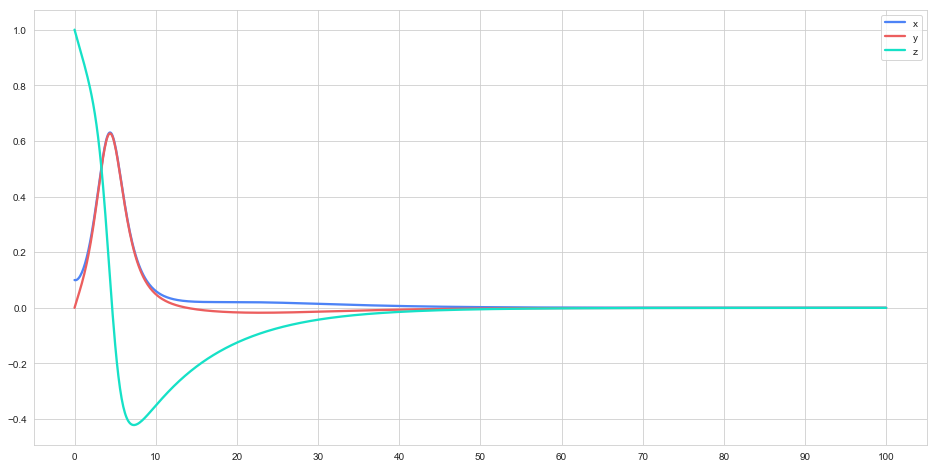

In [7]:
while delta < 0.15:
    r = odeint(model, r0, t)
    xmax = argrelextrema(r[:,0], np.greater)
    if len(xmax[0]) == 1:
          break
    delta += 0.0001
    

plt.figure(figsize = (16, 8))
plt.xticks(xt)
plt.plot(t, r[:,0], color = '#4d83f6', lw = 2.3, label = 'x')
plt.plot(t, r[:,1], color = '#ec5e5e', lw = 2.3, label = 'y')
plt.plot(t, r[:,2], color = '#16e1c7', lw = 2.3, label = 'z')
plt.legend()
print("Дельта критическая:  %.4f" % delta)

<div align="center"> <h2>Зависимость КПМ перекачи от затухания волны накачки</h2></div>

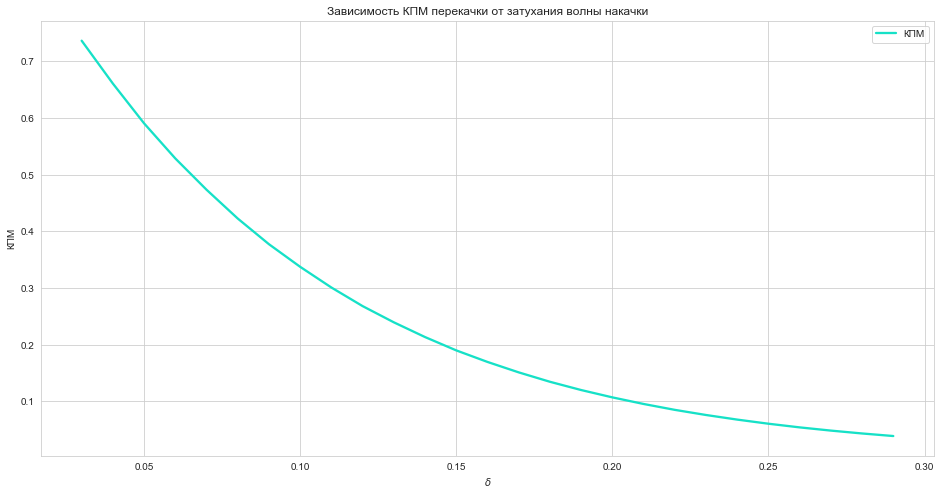

In [8]:
# system of differential equations (SDE)
def model(r, t):
    x = r[0]
    y = r[1]
    z = r[2]
    
    dxdt = y * z - delta1 * x
    dydt = x * z - delta2 * y
    dzdt = -x * y - delta3 * z
    drdt = [dxdt, dydt, dzdt]
    return drdt


# initial conditions
kpms = []
r0 = [0.1, 0, 1]
delta1, delta2, delta3 = 0, 0, 0.03

# params
t = np.linspace(0, 100, 1000)

# main loop
while delta3 < 0.3:
    r = odeint(model, r0, t)
    kpm = np.max(r[:,0])**2 * np.max(r[:,0])**2
    kpms.append(kpm)
    delta3 += 0.01
    
# plotting graphs
plt.figure(figsize = (16, 8))
plt.title('Зависимость КПМ перекачки от затухания волны накачки')
plt.xlabel('$\delta$')
plt.ylabel('КПМ')
plt.plot(np.arange(0.03, 0.3, 0.01), kpms, lw = 2.3, color = '#16e1c7', label = 'КПМ')
plt.legend()